In [ ]:
#  Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd

# Define the file path for data from Kool et al. 2017
data= '/content/drive/My Drive/Models/folder/data_kool/data.csv'
data_novel= '/content/drive/My Drive/Models/folder/data_kool/data-novel.csv'

# Load the CSV into a DataFrame
df_dataK = pd.read_csv(data, sep='\t')

df_data_novel = pd.read_csv(data_novel, sep='\t')
# Display the first few rows of the DataFrame
print(df_dataK.head(2))
print(df_data_novel.head(5))


# Define the file path
normal= '/content/drive/My Drive/Models/folder/output_normal_testTrained.csv'
novel= '/content/drive/My Drive/Models/folder/output_novel_testTrained.csv'

#normal refers to original task
# Load the CSV into a DataFrame
df_normal = pd.read_csv(normal)

df_novel= pd.read_csv(novel)
# Display the first few rows of the DataFrame
print(df_normal.head(2))
print(df_novel.head(2))




     ID  stim_1_left  stim_1_right   rt1  choice1  responsekey1  stim_2_left  \
0  Sub1            1             2  4652        2            74            1   
1  Sub1            2             1   868        2            70            2   

   stim_2_right   rt2  choice2  ...  state2  stake  score  practice  \
0             2  1052        2  ...       1      1      0         1   
1             1   684        2  ...       2      1      1         1   

   p_win_state1_action1  p_win_state1_action2  p_win_state2_action2  \
0              0.400000              0.600000               0.25000   
1              0.379874              0.605788               0.26889   

   p_win_state2_action2.1  trial_number  time_elapsed  
0                 0.75000             0        369858  
1                 0.73583             1        375640  

[2 rows x 22 columns]
     ID  state1  stim_left  stim_right   rt1  choice1  responsekey1  rt2  \
0  Sub1       2          4           3   717        4           

In [ ]:
#counting participants in original and novel data by kool et al.
unique_id_count = df_dataK['ID'].nunique()
print("Number of unique IDs in normal K:", unique_id_count)
unique_id_count_n = df_data_novel['ID'].nunique()
print("Number of unique IDs in novel K:", unique_id_count_n)


Number of unique IDs in normal K: 100
Number of unique IDs in novel K: 102


In [ ]:
# filtering out practice trials
filtered_df_normal = df_dataK[df_dataK['practice'] != 1]
filtered_df_novel = df_data_novel[df_data_novel['practice'] != 1]


In [ ]:
# Get all unique IDs
all_ids = filtered_df_novel['ID'].unique()

# Identify the last two unique IDs
last_two_ids = all_ids[-2:]

# Exclude rows where the ID is one of the last two IDs to make number of participants 100
filtered_novel_df = filtered_df_novel[~filtered_df_novel['ID'].isin(last_two_ids)]


In [ ]:
#making sure all files have the same number of participants and episodes
unique_id_count = filtered_df_normal['ID'].nunique()
print("Number of unique IDs in normal K:", unique_id_count)
unique_id_count_n = filtered_novel_df['ID'].nunique()
print("Number of unique IDs in novel K:", unique_id_count_n)

unique_id_count_nn = df_normal['episode'].nunique()
print("Number of unique episodes in normal K:", unique_id_count_nn)
unique_id_count_n_nn = df_novel['episode'].nunique()
print("Number of unique episodes in novel K:", unique_id_count_n_nn)

Number of unique IDs in normal K: 100
Number of unique IDs in novel K: 100
Number of unique episodes in normal K: 100
Number of unique episodes in novel K: 100


In [ ]:

common_index = filtered_df_normal.index.intersection(df_normal.index)
comparison = filtered_df_normal.loc[common_index, 'win'] > df_normal.loc[common_index, 'reward']


# Count how many times df1 has better scores
dfhumans_better = comparison.sum()

# Count how many times df2 has better scores
dfNN_better = (~comparison).sum()
# printing the results of comparing human vs. NN in original task, which has better rewards in general
print(f"df humans for original task has better win {dfhumans_better} times.")
print(f"df NN for novel task has better rewards {dfNN_better} times.")



# Calculate the sum of scores
df_human_total = filtered_df_normal['score'].sum()
df_NN_total = df_normal['score'].sum()
#printing th sum of scores for each group (Humans vs NN)
print(f"df humans in normal task total score: {df_human_total}")
print(f"df NN in normal task total score: {df_NN_total}")

# Determine the better DataFrame bigger sum of rewards
if df_human_total > df_NN_total:
    print("df humans has better overall scores.")
else:
    print("df NN has better overall scores.")

# Calculate the sum of rewards (rewards make up scores)
df_human_total = filtered_df_normal['win'].sum()
df_NN_total = df_normal['reward'].sum()

print(f"df humans in normal task total points: {df_human_total}")
print(f"df NN in normal task total reward: {df_NN_total}")

# Determine the better DataFrame has bigger sum of rewards
if df_human_total > df_NN_total:
    print("df humans has better overall points.")
else:
    print("df NN has better overall reward.")


df humans for original task has better win 4801 times.
df NN for novel task has better rewards 12874 times.
df humans in normal task total score: 2819945
df NN in normal task total score: 2906269
df NN has better overall scores.
df humans in normal task total points: 10508
df NN in normal task total reward: 29218
df NN has better overall reward.


In [ ]:
print(filtered_novel_df.head(5))


      ID  state1  stim_left  stim_right   rt1  choice1  responsekey1  rt2  \
25  Sub1       1          2           1   748        1            74  256   
26  Sub1       1          2           1  1018        2            70  309   
27  Sub1       2          4           3   810        3            74  267   
28  Sub1       2          3           4   601        3            70  336   
29  Sub1       2          3           4   711        3            70  301   

    points  state2  stake  score  practice  rews_s1  rews_s2  trial_nr  \
25       7       1      1      7         0        7        3         0   
26       0       2      1      7         0        6        0         1   
27       7       1      1     14         0        7        1         2   
28       7       1      1     21         0        7        1         3   
29       8       1      1     29         0        8        1         4   

    time_elapsed  
25        650712  
26        659742  
27        670186  
28        680680

In [ ]:
print(df_novel.head(5))


   episode  trial_num  actionInS1 stateInS1  reward  score  \
0        0          1           0     [2 1]       0      0   
1        0          2           0     [2 1]       3      3   
2        0          3           0     [2 1]       2      5   
3        0          4           0     [1 2]       5     10   
4        0          5           0     [4 3]       1     11   

  p_win_state1_action p_win_state2_action  stake  
0               [4.0]               [0.0]      1  
1             [1.294]             [3.134]      1  
2             [0.459]             [2.954]      5  
3             [1.021]              [2.21]      1  
4             [2.017]             [1.485]      1  


In [ ]:
import pandas as pd

####     Correcting Reward for Human choices on the novel task (filtered_novel_df)


# Step 1: Calculate Average Reward Distribution

filtered_novel_df.loc[:, 'reward_distribution'] = filtered_novel_df['rews_s1'] + filtered_novel_df['rews_s2']

average_reward_distribution = filtered_novel_df['reward_distribution'].mean()
# Step 2: Correct Rewards
filtered_novel_df.loc[:, 'corrected_reward'] = filtered_novel_df['points'] / average_reward_distribution


# Step 3: Compute Average Corrected Reward Rate
mean_corrected_reward_rate = filtered_novel_df['corrected_reward'].mean()

# Print Results
print("Average Reward Distribution:", average_reward_distribution)
print("Data with Corrected Rewards:\n", filtered_novel_df)
print("Mean Corrected Reward Rate:", mean_corrected_reward_rate)


Average Reward Distribution: 8.8758
Data with Corrected Rewards:
           ID  state1  stim_left  stim_right   rt1  choice1  responsekey1  rt2  \
25      Sub1       1          2           1   748        1            74  256   
26      Sub1       1          2           1  1018        2            70  309   
27      Sub1       2          4           3   810        3            74  267   
28      Sub1       2          3           4   601        3            70  336   
29      Sub1       2          3           4   711        3            70  301   
...      ...     ...        ...         ...   ...      ...           ...  ...   
22495  Sub99       1          1           2   533        2            74  801   
22496  Sub99       2          3           4  1024        3            70  384   
22497  Sub99       1          2           1   670        1            74  694   
22498  Sub99       1          2           1   592        2            70  597   
22499  Sub99       1          1           2

In [ ]:

# Convert columns from string to numeric for correcting reward on the NN df
df_novel['p_win_state1_action'] = df_novel['p_win_state1_action'].str.strip('[]').astype(float)
df_novel['p_win_state2_action'] = df_novel['p_win_state2_action'].str.strip('[]').astype(float)

df_novel['p_win_state1_action'] = df_novel['p_win_state1_action'].astype(int)
df_novel['p_win_state2_action'] = df_novel['p_win_state2_action'].astype(int)

print(df_novel.head(5))


   episode  trial_num  actionInS1 stateInS1  reward  score  \
0        0          1           0     [2 1]       0      0   
1        0          2           0     [2 1]       3      3   
2        0          3           0     [2 1]       2      5   
3        0          4           0     [1 2]       5     10   
4        0          5           0     [4 3]       1     11   

   p_win_state1_action  p_win_state2_action  stake reward_distribution  \
0                    4                    0      1                 4.0   
1                    1                    3      1               4.428   
2                    0                    2      5               3.413   
3                    1                    2      1               3.231   
4                    2                    1      1               3.502   

   corrected_reward  
0           0.00000  
1           0.32892  
2           0.21928  
3           0.54820  
4           0.10964  


In [ ]:
import pandas as pd

#   Correcting Reward for NN choices on the novel task (df_novel)

# Step 1: Calculate Average Reward Distribution

df_novel.loc[:, 'reward_distribution'] = df_novel['p_win_state1_action'] + df_novel['p_win_state2_action']

average_reward_distribution = df_novel['reward_distribution'].mean()

# Step 2: Correct Rewards
df_novel.loc[:, 'corrected_reward'] = df_novel['reward'] / average_reward_distribution



# Step 3: Compute Average Corrected Reward Rate
mean_corrected_reward_rate = df_novel['corrected_reward'].mean()

# Print Results
print("Average Reward Distribution:", average_reward_distribution)
print("Data with Corrected Rewards:\n", df_novel)
print("Mean Corrected Reward Rate:", mean_corrected_reward_rate)


Average Reward Distribution: 8.1236
Data with Corrected Rewards:
        episode  trial_num  actionInS1 stateInS1  reward  score  \
0            0          1           0     [2 1]       0      0   
1            0          2           0     [2 1]       3      3   
2            0          3           0     [2 1]       2      5   
3            0          4           0     [1 2]       5     10   
4            0          5           0     [4 3]       1     11   
...        ...        ...         ...       ...     ...    ...   
19995       99        196           0     [2 1]       0   2855   
19996       99        197           0     [2 1]       1   2856   
19997       99        198           0     [2 1]       0   2856   
19998       99        199           0     [3 4]       3   2859   
19999       99        200           0     [4 3]       1   2860   

       p_win_state1_action  p_win_state2_action  stake reward_distribution  \
0                        4                    0      1         

In [ ]:
# Calculate mean corrected reward for each group
human_mean = filtered_novel_df['corrected_reward'].mean()
NN_mean = df_novel['corrected_reward'].mean()

print(f"human Mean Corrected Reward: {human_mean}")
print(f"NN Mean Corrected Reward: {NN_mean}")


human Mean Corrected Reward: 0.5253554609161991
NN Mean Corrected Reward: 1.5022526958491311


In [ ]:
from scipy.stats import ttest_ind

# Extract corrected rewards for each group
human_rewards = filtered_novel_df['corrected_reward']
NN_rewards = df_novel['corrected_reward']

# Perform t-test
t_stat, p_value = ttest_ind(human_rewards, NN_rewards, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: -88.82380520830239, P-Value: 0.0


In [ ]:
#making sure both have the same length
print(len(human_rewards))
print(len(NN_rewards))

20000
20000


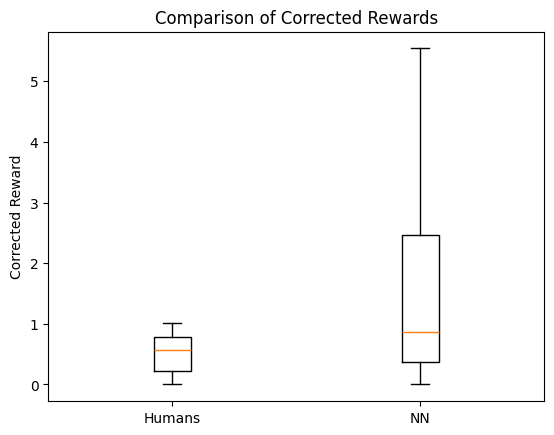

In [ ]:
import matplotlib.pyplot as plt

# Create a side-by-side boxplot
plt.boxplot([human_rewards, NN_rewards], labels=['Humans', 'NN'])
plt.title('Comparison of Corrected Rewards')
plt.ylabel('Corrected Reward')
plt.show()


In [ ]:
import numpy as np
# Extract corrected rewards for each group
human_rewards = filtered_novel_df['corrected_reward']
NN_rewards = df_novel['corrected_reward']

# Calculate group means
mean_humans = np.mean(human_rewards)
mean_NN = np.mean(NN_rewards)

# Calculate pooled standard deviation
std_H = np.std(human_rewards, ddof=1)  # Standard deviation for Group 1
std_NN = np.std(NN_rewards, ddof=1)  # Standard deviation for Group 2
n_H, n_NN = len(human_rewards), len(NN_rewards)

pooled_std = np.sqrt(((n_H - 1) * std_H**2 + (n_NN - 1) * std_NN**2) / (n_H + n_NN - 2))

# Calculate Cohen's d
cohens_d = (mean_NN - mean_humans) / pooled_std

print(f"Humans Mean: {mean_humans}, NN Mean: {mean_NN}")
print(f"Cohen's d: {cohens_d}")

Humans Mean: 0.5253554609161991, NN Mean: 1.5022526958491311
Cohen's d: 0.8882380520830078


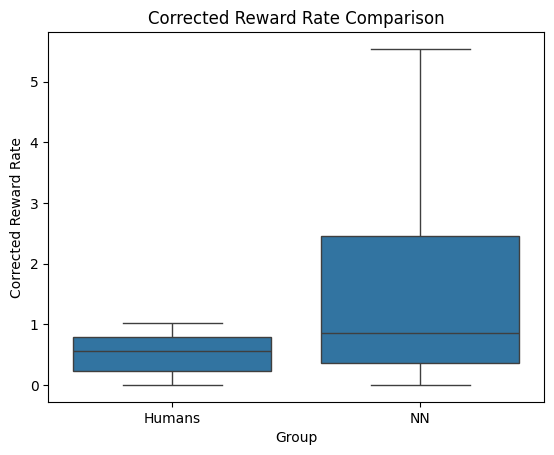

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine data for plotting
import pandas as pd
human_rewards = filtered_novel_df['corrected_reward']
NN_rewards = df_novel['corrected_reward']

combined_df = pd.DataFrame({
    'Group': ['Humans'] * len(human_rewards) + ['NN'] * len(NN_rewards),
    'Corrected Reward': np.concatenate([human_rewards, NN_rewards])
})

# Plot
sns.boxplot(data=combined_df, x='Group', y='Corrected Reward')
plt.title('Corrected Reward Rate Comparison')
plt.ylabel('Corrected Reward Rate')
plt.show()


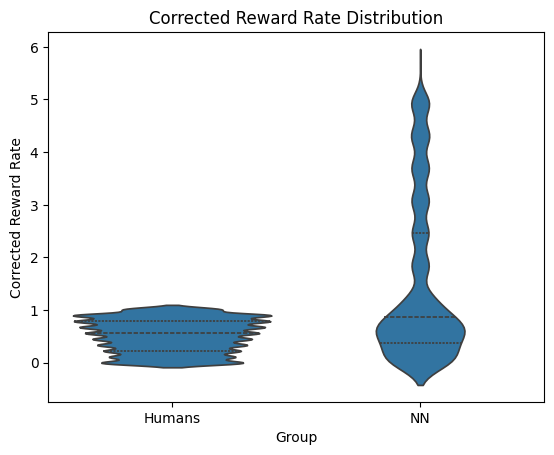

In [ ]:
sns.violinplot(data=combined_df, x='Group', y='Corrected Reward', inner='quartile')
plt.title('Corrected Reward Rate Distribution')
plt.ylabel('Corrected Reward Rate')
plt.show()
